In [ ]:
import requests
from bs4 import BeautifulSoup
import re, string, unicodedata                                          #Used for Text PreProcessing
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt                                         # Used for plotting
import seaborn as sns                                                   # Used for plotting
from collections import Counter                                           # count the key-value pairs in an object

from wordcloud import WordCloud, STOPWORDS          # Used for plotting the wordcloud of a corpus
import nltk                                                               # Used for different task of NLP
from nltk.corpus import stopwords                                         # Used for removal of stop words
import warnings                                                           
warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer

In [ ]:
url = 'https://lyrics.az/youngboy-never-broke-again/allalbums.html'
response = requests.get(url)

In [ ]:
response

<Response [200]>

In [ ]:
response.status_code

200

In [ ]:
print(response.text[:1000])

﻿
<!DOCTYPE html>
<html lang="en">
<head>
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-7578349-3"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-7578349-3');
</script>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta name="msvalidate.01" content="E436FF1665FAB5BD991FBCAF8D0692FB" />
<meta name="viewport" content="width=device-width, initial-scale=1">
<meta name="csrf-token" content="FoyATWFaaK9yBudHCi3lHmTeYYItblFfAUeIjJYR">
<meta name="msapplication-TileColor" content="#da532c">
<meta name="theme-color" content="#ffffff">
<title>YoungBoy Never Broke Again albums | AZ Lyrics.az</title>
<meta name="title" content="YoungBoy Never Broke Again albums | AZ Lyrics.az">
<link rel="amphtml" href="https://lyrics.az/amp/youngboy-never-broke-again/allalbums.html">
<link rel="manifest" href="https://lyrics.az/images/fav/site.webmanifest">
</

In [ ]:
type(response.text)

str

In [ ]:
soup=BeautifulSoup(response.text, 'html.parser')
soup

﻿
<!DOCTYPE html>

<html lang="en">
<head>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-7578349-3"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-7578349-3');
</script>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="E436FF1665FAB5BD991FBCAF8D0692FB" name="msvalidate.01"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="FoyATWFaaK9yBudHCi3lHmTeYYItblFfAUeIjJYR" name="csrf-token"/>
<meta content="#da532c" name="msapplication-TileColor"/>
<meta content="#ffffff" name="theme-color"/>
<title>YoungBoy Never Broke Again albums | AZ Lyrics.az</title>
<meta content="YoungBoy Never Broke Again albums | AZ Lyrics.az" name="title"/>
<link href="https://lyrics.az/amp/youngboy-never-broke-again/allalbums.html" rel="amphtml"/>
<link href="https://lyrics.az/images/fav/site.webmanifest" rel="manif

In [ ]:
# to extract the first song title
print(soup.find(class_='py-1 default-link dark list-group-item list-group-item-action').text)

# to extract the firt song url
print(soup.find(class_='py-1 default-link dark list-group-item list-group-item-action')['href'])

2Hoo
https://lyrics.az/youngboy-never-broke-again/colors/2hoo.html


In [ ]:
print(soup.find(class_='py-1 default-link dark list-group-item list-group-item-action'))

<a class="py-1 default-link dark list-group-item list-group-item-action" href="https://lyrics.az/youngboy-never-broke-again/colors/2hoo.html" itemprop="url" title="YoungBoy Never Broke Again - 2Hoo lyrics">2Hoo</a>


In [ ]:
# to find all urls
urls =[]
titles = []
for link in soup.find_all(class_='py-1 default-link dark list-group-item list-group-item-action'):
    urls.append(link['href'])
    titles.append(link.text)
urls

['https://lyrics.az/youngboy-never-broke-again/colors/2hoo.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/bring-it-on.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/bring-the-hook.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/cage-feeling.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/dc-marvel.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/dis-that.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/emo-love.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/emo-rockstar.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/evil-eye-evil-i-see.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/expensive-taste.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/fish-scale.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/flossin.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/foolish-figure.html',
 'https://lyrics.az/youngboy-never-broke-again/colo

In [ ]:
urls

['https://lyrics.az/youngboy-never-broke-again/colors/2hoo.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/bring-it-on.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/bring-the-hook.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/cage-feeling.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/dc-marvel.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/dis-that.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/emo-love.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/emo-rockstar.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/evil-eye-evil-i-see.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/expensive-taste.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/fish-scale.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/flossin.html',
 'https://lyrics.az/youngboy-never-broke-again/colors/foolish-figure.html',
 'https://lyrics.az/youngboy-never-broke-again/colo

In [ ]:
titles

['2Hoo',
 'Bring It On',
 'Bring the Hook',
 'Cage Feeling',
 'DC Marvel',
 'Dis & That',
 'Emo Love',
 'Emo Rockstar',
 'Evil Eye (Evil I See)**',
 'Expensive Taste',
 'Fish Scale',
 'Flossin’',
 'Foolish Figure',
 'Gangsta',
 'How You Been',
 'I Got This',
 'Know Like I Know',
 'Long Live',
 'No Switch',
 'Popping Shit**',
 'Proud of Me**',
 'Smoke One',
 'Snow Bunny',
 'Thug Life (Fucked Up / Adin Ross Diss)**',
 '50 Shots',
 'All I Need',
 'Bad Mornings',
 'Baddest Thing',
 'Break Or Make Me',
 'Eyes of the Nation',
 'Footstep',
 'Forgiato',
 'Green Dot',
 'Hit Stick/ Mask On 2',
 'Hold Me Down',
 'How I Been',
 'I Ain’t Scared',
 'I Can’t Take It Back',
 'It Ain’t Over',
 'Jamaican Talk',
 'Kickstand',
 'Level I Want To Reach',
 'Life On The Edge',
 'Life Support',
 'Murda Man',
 'My Killa',
 'My Side',
 'Nevada',
 'No Where',
 'On My Side',
 'Panoramic',
 'Rich Shit',
 'Right Now',
 'Sincerely',
 'Smoke Strong',
 'Still Waiting',
 'Territorial',
 'Toxic Punk',
 'White Teeth',
 'B

In [ ]:
df=pd.DataFrame({'titles': titles, 'urls': urls})
df

,titles,urls
0,2Hoo,https://lyrics.az/youngboy-never-broke-again/c...
1,Bring It On,https://lyrics.az/youngboy-never-broke-again/c...
2,Bring the Hook,https://lyrics.az/youngboy-never-broke-again/c...
3,Cage Feeling,https://lyrics.az/youngboy-never-broke-again/c...
4,DC Marvel,https://lyrics.az/youngboy-never-broke-again/c...
...,...,...
160,Moral,https://lyrics.az/youngboy-never-broke-again/b...
161,Alotta Miles,https://lyrics.az/youngboy-never-broke-again/m...
162,Bandz,https://lyrics.az/youngboy-never-broke-again/m...
163,Fact,https://lyrics.az/youngboy-never-broke-again/m...


In [ ]:
BeautifulSoup(requests.get('https://lyrics.az/youngboy-never-broke-again/colors/2hoo.html').text).find(class_='song-lyrics').text

'[Intro]\nIn this b*tch, this lil\' Top tho\n[Chorus]\nThree-sixty, I’m with it, she eat it, I lick it\nMovin’ fast, I’m on her ass\nOkay, I get it\nGrab her hair, she throw it back, I’m hittin’ it, givin’ her the business\nMurder scene, I stick two up her body, know I had to kill it\nI’m with it, ain’t finished, let’s get it, ooh\nI grip her body, make sure I got it\nHold on, I ain’t through\nCan’t figure what you do to me, know what I’ma do to you\nSay she can’t get enough of me, say “I can’t get enough too-hoo, hoo”\nNow turn around, I beat it down, she say she wan’ go some rounds\nI ask “How many?” She say “Two-hoo, hoo”\nI keep her ‘round\nI asked her can she bring some friends?\nSmoke out the pound\nShe asked “How many?” I say “Two”\n[Verse 1]\nSay she like it, ooh, ooh\nThen I start to hittin\' it bad\nShe get on top, she milly rock, I vision lots amounts of cash\nSwim in her waist but it\'s okay\nTryna give a lots amounts of ass\nShoot on her face, I did that bad\nShe say "Bad,

In [ ]:
df.urls

0      https://lyrics.az/youngboy-never-broke-again/c...
1      https://lyrics.az/youngboy-never-broke-again/c...
2      https://lyrics.az/youngboy-never-broke-again/c...
3      https://lyrics.az/youngboy-never-broke-again/c...
4      https://lyrics.az/youngboy-never-broke-again/c...
                             ...                        
160    https://lyrics.az/youngboy-never-broke-again/b...
161    https://lyrics.az/youngboy-never-broke-again/m...
162    https://lyrics.az/youngboy-never-broke-again/m...
163    https://lyrics.az/youngboy-never-broke-again/m...
164    https://lyrics.az/youngboy-never-broke-again/m...
Name: urls, Length: 165, dtype: object

In [ ]:
import time
df['lyrics']='text'
for index in range(len(df.urls)):
    try:
        soup=BeautifulSoup(requests.get(df.urls[index]).text)
        lyrics=soup.find(class_='song-lyrics').text
        df['lyrics'][index] = lyrics
    except:
        continue

In [ ]:
#df = pd.DataFrame({'title': titles, 'urls': urls})
df

,titles,urls,lyrics
0,2Hoo,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nIn this b*tch, this lil' Top tho\n[Ch..."
1,Bring It On,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\n(Any last words?)\n(D-Roc)\n[Refrain]...
2,Bring the Hook,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\nAny last words?\nIt's a murder busine...
3,Cage Feeling,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nAyo bans, what you cookin?\nYeah\nI w..."
4,DC Marvel,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nDouble R\nBeezo need cash only, you d..."
...,...,...,...
160,Moral,https://lyrics.az/youngboy-never-broke-again/b...,[Intro]\nOnly Sixteen\n[Verse 1]\nI'm on the p...
161,Alotta Miles,https://lyrics.az/youngboy-never-broke-again/m...,[Hook]\nWe done walked allot of miles for this...
162,Bandz,https://lyrics.az/youngboy-never-broke-again/m...,"[Intro]\nCan't hear what you sayin'\nAy Ay, Yo..."
163,Fact,https://lyrics.az/youngboy-never-broke-again/m...,[Hook]\nI remember I ain't had nun\nI had to g...


In [ ]:
url1='https://lyrics.az/s-club/allsongs.html'

In [ ]:
response1=requests.get(url1)
response1

<Response [200]>

In [ ]:
print(response.text[:1000])

﻿
<!DOCTYPE html>
<html lang="en">
<head>
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-7578349-3"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-7578349-3');
</script>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta name="msvalidate.01" content="E436FF1665FAB5BD991FBCAF8D0692FB" />
<meta name="viewport" content="width=device-width, initial-scale=1">
<meta name="csrf-token" content="FoyATWFaaK9yBudHCi3lHmTeYYItblFfAUeIjJYR">
<meta name="msapplication-TileColor" content="#da532c">
<meta name="theme-color" content="#ffffff">
<title>YoungBoy Never Broke Again albums | AZ Lyrics.az</title>
<meta name="title" content="YoungBoy Never Broke Again albums | AZ Lyrics.az">
<link rel="amphtml" href="https://lyrics.az/amp/youngboy-never-broke-again/allalbums.html">
<link rel="manifest" href="https://lyrics.az/images/fav/site.webmanifest">
</

In [ ]:
soup1=BeautifulSoup(response1.text, 'html.parser')
soup1

﻿
<!DOCTYPE html>

<html lang="en">
<head>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-7578349-3"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-7578349-3');
</script>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="E436FF1665FAB5BD991FBCAF8D0692FB" name="msvalidate.01"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="ky25zctZnrfpkQMLwBb6pGXSO29kzvs0YIeEVC6H" name="csrf-token"/>
<meta content="#da532c" name="msapplication-TileColor"/>
<meta content="#ffffff" name="theme-color"/>
<title>S Club songs | AZ Lyrics.az</title>
<meta content="S Club songs | AZ Lyrics.az" name="title"/>
<link href="https://lyrics.az/amp/s-club/allsongs.html" rel="amphtml"/>
<link href="https://lyrics.az/images/fav/site.webmanifest" rel="manifest"/>
</head>
<body>
<div class="wrapper">
<header class="main

In [ ]:
print(soup1.find(class_='px-2 py-1 default-link list-group-item-action d-block').text)

Anytime, Anywhere


In [ ]:
urls=[]
titles=[]
for link in soup1.find_all(class_='px-2 py-1 default-link list-group-item-action d-block'):
    urls.append(link['href'])
    titles.append(link.text)
urls

['https://lyrics.az/s-club/-/anytime-anywhere.html',
 'https://lyrics.az/s-club/-/automatic-high.html',
 'https://lyrics.az/s-club/seeing-double/bittersweet.html',
 'https://lyrics.az/s-club/-/bring-it-all-back.html',
 'https://lyrics.az/s-club/-/can-you-feel-the-love-tonight.html',
 'https://lyrics.az/s-club/seeing-double/dance.html',
 'https://lyrics.az/s-club/seeing-double/do-it-till-we-drop.html',
 'https://lyrics.az/s-club/-/dont-stop-movin.html',
 'https://lyrics.az/s-club/seeing-double/every-kinda-people.html',
 'https://lyrics.az/s-club/-/everybody-get-pumped.html',
 'https://lyrics.az/s-club/-/feel-the-beat.html',
 'https://lyrics.az/s-club/seeing-double/gangsta-love.html',
 'https://lyrics.az/s-club/-/have-you-ever.html',
 'https://lyrics.az/s-club/seeing-double/hey-kitty-kitty.html',
 'https://lyrics.az/s-club/-/i-come-alive.html',
 'https://lyrics.az/s-club/seeing-double/in-too-deep.html',
 'https://lyrics.az/s-club/seeing-double/let-me-sleep.html',
 'https://lyrics.az/s-cl

In [ ]:
titles

['Anytime, Anywhere',
 'Automatic High',
 'Bittersweet',
 'Bring It All Back',
 'Can You Feel the Love Tonight',
 'Dance',
 'Do It Till We Drop',
 "Don't Stop Movin'",
 'Every Kinda People',
 'Everybody Get Pumped',
 'Feel The Beat',
 'Gangsta Love',
 'Have You Ever',
 'Hey Kitty Kitty',
 'I Come Alive',
 'In Too Deep',
 'Let Me Sleep',
 "Love Ain't Gonna Wait For You",
 'Never Had A Dream Come True',
 'New Direction',
 'One Fine Day',
 'One Step Closer',
 'Only You',
 'Puppy Love',
 'Reach',
 'Say Goodbye',
 'Secret Love',
 'Show Me Your Colours',
 'Special KInd Of Something',
 'Straight From the Heart',
 'The Greatest',
 'Together',
 'Wherever You Are',
 'Who Do You Think You Are?',
 "Whole Lotta Nothin'",
 'You Are The One']

In [ ]:
df1=pd.DataFrame({'titles': titles, 'urls': urls})
df1

,titles,urls
0,"Anytime, Anywhere",https://lyrics.az/s-club/-/anytime-anywhere.html
1,Automatic High,https://lyrics.az/s-club/-/automatic-high.html
2,Bittersweet,https://lyrics.az/s-club/seeing-double/bitters...
3,Bring It All Back,https://lyrics.az/s-club/-/bring-it-all-back.html
4,Can You Feel the Love Tonight,https://lyrics.az/s-club/-/can-you-feel-the-lo...
5,Dance,https://lyrics.az/s-club/seeing-double/dance.html
6,Do It Till We Drop,https://lyrics.az/s-club/seeing-double/do-it-t...
7,Don't Stop Movin',https://lyrics.az/s-club/-/dont-stop-movin.html
8,Every Kinda People,https://lyrics.az/s-club/seeing-double/every-k...
9,Everybody Get Pumped,https://lyrics.az/s-club/-/everybody-get-pumpe...


In [ ]:
df1['lyrics']='text'
for index in range(len(df1.urls)):
        soup=BeautifulSoup(requests.get(df1.urls[index]).text)
        lyrics=soup.find(class_='song-lyrics').text
        df1['lyrics'][index] = lyrics

In [ ]:
df1

,titles,urls,lyrics
0,"Anytime, Anywhere",https://lyrics.az/s-club/-/anytime-anywhere.html,I know life sometimes can spin your head aroun...
1,Automatic High,https://lyrics.az/s-club/-/automatic-high.html,"Automatic, Automatic\nYou give me that special..."
2,Bittersweet,https://lyrics.az/s-club/seeing-double/bitters...,I still think about how it used to be\nSo entw...
3,Bring It All Back,https://lyrics.az/s-club/-/bring-it-all-back.html,"Bring it all back now\nDon't stop, never give ..."
4,Can You Feel the Love Tonight,https://lyrics.az/s-club/-/can-you-feel-the-lo...,\n\n\n (adsbygoogle = window.adsbygoogle |...
5,Dance,https://lyrics.az/s-club/seeing-double/dance.html,Baby\nI know I can see what you like\nAs you'r...
6,Do It Till We Drop,https://lyrics.az/s-club/seeing-double/do-it-t...,Come out and play with me baby\nLike girls do\...
7,Don't Stop Movin',https://lyrics.az/s-club/-/dont-stop-movin.html,"Don't stop moving to that funky, funky beat\nD..."
8,Every Kinda People,https://lyrics.az/s-club/seeing-double/every-k...,Said the fight to make ends meet\nKeeps a man ...
9,Everybody Get Pumped,https://lyrics.az/s-club/-/everybody-get-pumpe...,C'mon get the party started\nEverybody get pum...


In [ ]:
df1['artist'] = 'S Club Songs'

In [ ]:
df1

,titles,urls,lyrics,artist
0,"Anytime, Anywhere",https://lyrics.az/s-club/-/anytime-anywhere.html,I know life sometimes can spin your head aroun...,S Club Songs
1,Automatic High,https://lyrics.az/s-club/-/automatic-high.html,"Automatic, Automatic\nYou give me that special...",S Club Songs
2,Bittersweet,https://lyrics.az/s-club/seeing-double/bitters...,I still think about how it used to be\nSo entw...,S Club Songs
3,Bring It All Back,https://lyrics.az/s-club/-/bring-it-all-back.html,"Bring it all back now\nDon't stop, never give ...",S Club Songs
4,Can You Feel the Love Tonight,https://lyrics.az/s-club/-/can-you-feel-the-lo...,\n\n\n (adsbygoogle = window.adsbygoogle |...,S Club Songs
5,Dance,https://lyrics.az/s-club/seeing-double/dance.html,Baby\nI know I can see what you like\nAs you'r...,S Club Songs
6,Do It Till We Drop,https://lyrics.az/s-club/seeing-double/do-it-t...,Come out and play with me baby\nLike girls do\...,S Club Songs
7,Don't Stop Movin',https://lyrics.az/s-club/-/dont-stop-movin.html,"Don't stop moving to that funky, funky beat\nD...",S Club Songs
8,Every Kinda People,https://lyrics.az/s-club/seeing-double/every-k...,Said the fight to make ends meet\nKeeps a man ...,S Club Songs
9,Everybody Get Pumped,https://lyrics.az/s-club/-/everybody-get-pumpe...,C'mon get the party started\nEverybody get pum...,S Club Songs


In [ ]:
df['artist'] = 'Y Club Songs'

In [ ]:
df

,titles,urls,lyrics,artist
0,2Hoo,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nIn this b*tch, this lil' Top tho\n[Ch...",Y Club Songs
1,Bring It On,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\n(Any last words?)\n(D-Roc)\n[Refrain]...,Y Club Songs
2,Bring the Hook,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\nAny last words?\nIt's a murder busine...,Y Club Songs
3,Cage Feeling,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nAyo bans, what you cookin?\nYeah\nI w...",Y Club Songs
4,DC Marvel,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nDouble R\nBeezo need cash only, you d...",Y Club Songs
...,...,...,...,...
160,Moral,https://lyrics.az/youngboy-never-broke-again/b...,[Intro]\nOnly Sixteen\n[Verse 1]\nI'm on the p...,Y Club Songs
161,Alotta Miles,https://lyrics.az/youngboy-never-broke-again/m...,[Hook]\nWe done walked allot of miles for this...,Y Club Songs
162,Bandz,https://lyrics.az/youngboy-never-broke-again/m...,"[Intro]\nCan't hear what you sayin'\nAy Ay, Yo...",Y Club Songs
163,Fact,https://lyrics.az/youngboy-never-broke-again/m...,[Hook]\nI remember I ain't had nun\nI had to g...,Y Club Songs


In [ ]:
df=df.append(df1, ignore_index=True)
df

,titles,urls,lyrics,artist
0,2Hoo,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nIn this b*tch, this lil' Top tho\n[Ch...",Y Club Songs
1,Bring It On,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\n(Any last words?)\n(D-Roc)\n[Refrain]...,Y Club Songs
2,Bring the Hook,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\nAny last words?\nIt's a murder busine...,Y Club Songs
3,Cage Feeling,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nAyo bans, what you cookin?\nYeah\nI w...",Y Club Songs
4,DC Marvel,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nDouble R\nBeezo need cash only, you d...",Y Club Songs
...,...,...,...,...
196,Together,https://lyrics.az/s-club/-/together.html,Da da da da da da da da\nDa da da da da da da ...,S Club Songs
197,Wherever You Are,https://lyrics.az/s-club/-/wherever-you-are.html,Wherever you are\nWherever you are\nI feel you...,S Club Songs
198,Who Do You Think You Are?,https://lyrics.az/s-club/seeing-double/who-do-...,Jon:\nWe've been living a lie\nWe're not what ...,S Club Songs
199,Whole Lotta Nothin',https://lyrics.az/s-club/seeing-double/whole-l...,Whole lotta nothing\nOh yeah yeah\nTake me on ...,S Club Songs


In [ ]:
df['artist'].value_counts()

Y Club Songs    165
S Club Songs     36
Name: artist, dtype: int64

Text(0.5, 0.98, 'Charecter counts lyrics')

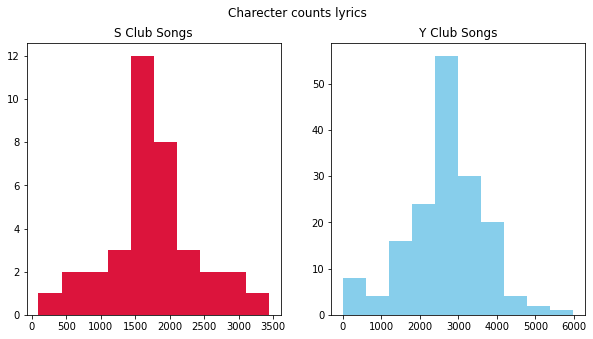

In [ ]:
#Number of characters in songs
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
lyrics_len = df[df['artist']=='S Club Songs']['lyrics'].str.len()
ax1.hist(lyrics_len,color='crimson')
ax1.set_title('S Club Songs')
lyrics_len = df[df['artist']=='Y Club Songs']['lyrics'].str.len()
ax2.hist(lyrics_len,color='skyblue')
ax2.set_title('Y Club Songs')
fig.suptitle('Charecter counts lyrics')

Text(0.5, 0.98, 'Word Count in lyrics')

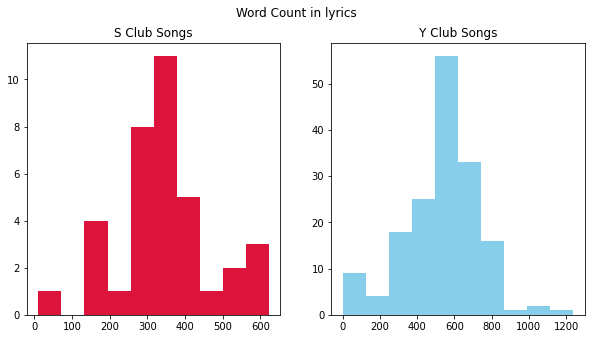

In [ ]:
#Number of Words in songs
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
lyrics_len = df[df['artist']=='S Club Songs']['lyrics'].str.split().map(lambda x: len(x))
ax1.hist(lyrics_len,color='crimson')
ax1.set_title('S Club Songs')
lyrics_len = df[df['artist']=='Y Club Songs']['lyrics'].str.split().map(lambda x: len(x))
ax2.hist(lyrics_len,color='skyblue')
ax2.set_title('Y Club Songs')
fig.suptitle('Word Count in lyrics')

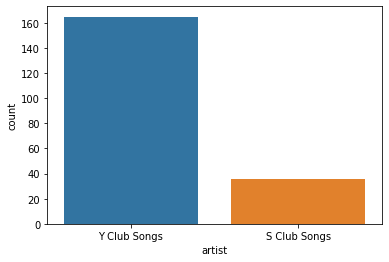

In [ ]:
sns.countplot(x='artist', data=df)

In [ ]:
#Removal of the http link using Regular Expression.
for i, row in df.iterrows():
    clean_lyrics = re.sub(r"http\S+", "", df.at[i,'lyrics'])
    df.at[i,'lyrics'] = clean_lyrics
df.head()

,titles,urls,lyrics,artist
0,2Hoo,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nIn this b*tch, this lil' Top tho\n[Ch...",Y Club Songs
1,Bring It On,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\n(Any last words?)\n(D-Roc)\n[Refrain]...,Y Club Songs
2,Bring the Hook,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\nAny last words?\nIt's a murder busine...,Y Club Songs
3,Cage Feeling,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nAyo bans, what you cookin?\nYeah\nI w...",Y Club Songs
4,DC Marvel,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nDouble R\nBeezo need cash only, you d...",Y Club Songs


In [ ]:
for i, row in df.iterrows():
    clean_titles = re.sub(r"http\S+", "", df.at[i,'titles'])
    df.at[i,'titles'] = clean_titles
df.head()

,titles,urls,lyrics,artist
0,2Hoo,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nIn this b*tch, this lil' Top tho\n[Ch...",Y Club Songs
1,Bring It On,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\n(Any last words?)\n(D-Roc)\n[Refrain]...,Y Club Songs
2,Bring the Hook,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\nAny last words?\nIt's a murder busine...,Y Club Songs
3,Cage Feeling,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nAyo bans, what you cookin?\nYeah\nI w...",Y Club Songs
4,DC Marvel,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nDouble R\nBeezo need cash only, you d...",Y Club Songs


In [ ]:
!pip install contractions

In [ ]:
import contractions

In [ ]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

In [ ]:
# Perform the above operation over all the rows of tweet column of the dataframe.
for i, row in df.iterrows():
    content = df.at[i, 'lyrics']
    clean_content = replace_contractions(content)
    df.at[i,'lyrics'] = clean_content
df.head()

,titles,urls,lyrics,artist
0,2Hoo,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nIn this b*tch, this lil' Top tho\n[Ch...",Y Club Songs
1,Bring It On,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\n(Any last words?)\n(D-Roc)\n[Refrain]...,Y Club Songs
2,Bring the Hook,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\nAny last words?\nIt is a murder busin...,Y Club Songs
3,Cage Feeling,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nAyo bans, what you cookin?\nYeah\nI w...",Y Club Songs
4,DC Marvel,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nDouble R\nBeezo need cash only, you d...",Y Club Songs


In [ ]:
# Perform the above operation over all the rows of tweet column of the dataframe.
for i, row in df.iterrows():
    content = df.at[i, 'titles']
    clean_content = replace_contractions(content)
    df.at[i,'titles'] = clean_content
df.head()

,titles,urls,lyrics,artist
0,2Hoo,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nIn this b*tch, this lil' Top tho\n[Ch...",Y Club Songs
1,Bring It On,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\n(Any last words?)\n(D-Roc)\n[Refrain]...,Y Club Songs
2,Bring the Hook,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\nAny last words?\nIt is a murder busin...,Y Club Songs
3,Cage Feeling,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nAyo bans, what you cookin?\nYeah\nI w...",Y Club Songs
4,DC Marvel,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nDouble R\nBeezo need cash only, you d...",Y Club Songs


In [ ]:
def replace_contractions(text):
  """Replace contractions in string of text"""
  return contractions.fix(text)

In [ ]:
for i, row in df.iterrows():
  content = df.at[i, 'lyrics']
  clean_content = replace_contractions(content)
  df.at[i, 'lyrics'] = clean_content
df.head()

,titles,urls,lyrics,artist
0,2Hoo,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nIn this b*tch, this lil' Top tho\n[Ch...",Y Club Songs
1,Bring It On,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\n(Any last words?)\n(D-Roc)\n[Refrain]...,Y Club Songs
2,Bring the Hook,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\nAny last words?\nIt is a murder busin...,Y Club Songs
3,Cage Feeling,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nAyo bans, what you cookin?\nYeah\nI w...",Y Club Songs
4,DC Marvel,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nDouble R\nBeezo need cash only, you d...",Y Club Songs


In [ ]:
for i, row in df.iterrows():
  content = df.at[i, 'titles']
  clean_content = replace_contractions(content)
  df.at[i, 'titles'] = clean_content
df.head()

,titles,urls,lyrics,artist
0,2Hoo,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nIn this b*tch, this lil' Top tho\n[Ch...",Y Club Songs
1,Bring It On,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\n(Any last words?)\n(D-Roc)\n[Refrain]...,Y Club Songs
2,Bring the Hook,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\nAny last words?\nIt is a murder busin...,Y Club Songs
3,Cage Feeling,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nAyo bans, what you cookin?\nYeah\nI w...",Y Club Songs
4,DC Marvel,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nDouble R\nBeezo need cash only, you d...",Y Club Songs


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

df['lyrics'] = df['lyrics'].apply(lambda x: remove_numbers(x))
df['titles'] = df['titles'].apply(lambda x: remove_numbers(x))

df.head()

,titles,urls,lyrics,artist
0,Hoo,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nIn this b*tch, this lil' Top tho\n[Ch...",Y Club Songs
1,Bring It On,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\n(Any last words?)\n(D-Roc)\n[Refrain]...,Y Club Songs
2,Bring the Hook,https://lyrics.az/youngboy-never-broke-again/c...,[Intro]\nAny last words?\nIt is a murder busin...,Y Club Songs
3,Cage Feeling,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nAyo bans, what you cookin?\nYeah\nI w...",Y Club Songs
4,DC Marvel,https://lyrics.az/youngboy-never-broke-again/c...,"[Intro]\nDouble R\nBeezo need cash only, you d...",Y Club Songs


In [ ]:
#Tokenization of the data
df['lyrics'] = df.apply(lambda row: nltk.word_tokenize(row['lyrics']), axis=1)
df['titles'] = df.apply(lambda row: nltk.word_tokenize(row['titles']), axis=1)
df.head()


,titles,urls,lyrics,artist
0,[Hoo],https://lyrics.az/youngboy-never-broke-again/c...,"[[, Intro, ], In, this, b*tch, ,, this, lil, '...",Y Club Songs
1,"[Bring, It, On]",https://lyrics.az/youngboy-never-broke-again/c...,"[[, Intro, ], (, Any, last, words, ?, ), (, D-...",Y Club Songs
2,"[Bring, the, Hook]",https://lyrics.az/youngboy-never-broke-again/c...,"[[, Intro, ], Any, last, words, ?, It, is, a, ...",Y Club Songs
3,"[Cage, Feeling]",https://lyrics.az/youngboy-never-broke-again/c...,"[[, Intro, ], Ayo, bans, ,, what, you, cookin,...",Y Club Songs
4,"[DC, Marvel]",https://lyrics.az/youngboy-never-broke-again/c...,"[[, Intro, ], Double, R, Beezo, need, cash, on...",Y Club Songs


In [ ]:
#Removing non Ascii words
def remove_non_ascii(words):
  """Remove non=ASCII characters from list of tokenized words"""
  new_words = []
  for word in words:
    new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    new_words.append(new_word)
  return new_words

In [ ]:
df['lyrics'] = df['lyrics'].apply(lambda x: remove_non_ascii(x))
df['titles'] = df['titles'].apply(lambda x: remove_non_ascii(x))
df.head()

,titles,urls,lyrics,artist
0,[Hoo],https://lyrics.az/youngboy-never-broke-again/c...,"[[, Intro, ], In, this, b*tch, ,, this, lil, '...",Y Club Songs
1,"[Bring, It, On]",https://lyrics.az/youngboy-never-broke-again/c...,"[[, Intro, ], (, Any, last, words, ?, ), (, D-...",Y Club Songs
2,"[Bring, the, Hook]",https://lyrics.az/youngboy-never-broke-again/c...,"[[, Intro, ], Any, last, words, ?, It, is, a, ...",Y Club Songs
3,"[Cage, Feeling]",https://lyrics.az/youngboy-never-broke-again/c...,"[[, Intro, ], Ayo, bans, ,, what, you, cookin,...",Y Club Songs
4,"[DC, Marvel]",https://lyrics.az/youngboy-never-broke-again/c...,"[[, Intro, ], Double, R, Beezo, need, cash, on...",Y Club Songs


In [ ]:
def to_lowercase(words):
  """Convert all characters to lowercase from list of tokenized words"""
  new_words = []
  for word in words: 
    new_word = word.lower()
    new_words.append(new_word)
  return new_words

In [ ]:
df['lyrics'] = df['lyrics'].apply(lambda x: to_lowercase(x))
df['titles'] = df['titles'].apply(lambda x: to_lowercase(x))
df.head()

,titles,urls,lyrics,artist
0,[hoo],https://lyrics.az/youngboy-never-broke-again/c...,"[[, intro, ], in, this, b*tch, ,, this, lil, '...",Y Club Songs
1,"[bring, it, on]",https://lyrics.az/youngboy-never-broke-again/c...,"[[, intro, ], (, any, last, words, ?, ), (, d-...",Y Club Songs
2,"[bring, the, hook]",https://lyrics.az/youngboy-never-broke-again/c...,"[[, intro, ], any, last, words, ?, it, is, a, ...",Y Club Songs
3,"[cage, feeling]",https://lyrics.az/youngboy-never-broke-again/c...,"[[, intro, ], ayo, bans, ,, what, you, cookin,...",Y Club Songs
4,"[dc, marvel]",https://lyrics.az/youngboy-never-broke-again/c...,"[[, intro, ], double, r, beezo, need, cash, on...",Y Club Songs


In [ ]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [ ]:
df['lyrics'] = df['lyrics'].apply(lambda x: remove_punctuation(x))
df['titles'] = df['titles'].apply(lambda x: remove_punctuation(x))
df.head()

,titles,urls,lyrics,artist
0,[hoo],https://lyrics.az/youngboy-never-broke-again/c...,"[intro, in, this, btch, this, lil, top, tho, c...",Y Club Songs
1,"[bring, it, on]",https://lyrics.az/youngboy-never-broke-again/c...,"[intro, any, last, words, droc, refrain, i, se...",Y Club Songs
2,"[bring, the, hook]",https://lyrics.az/youngboy-never-broke-again/c...,"[intro, any, last, words, it, is, a, murder, b...",Y Club Songs
3,"[cage, feeling]",https://lyrics.az/youngboy-never-broke-again/c...,"[intro, ayo, bans, what, you, cookin, yeah, i,...",Y Club Songs
4,"[dc, marvel]",https://lyrics.az/youngboy-never-broke-again/c...,"[intro, double, r, beezo, need, cash, only, yo...",Y Club Songs


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = stopwords.words('english')

In [ ]:
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [ ]:

stopwords = list(set(stopwords) - set(customlist))

In [ ]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
      if word not in stopwords:
        new_words.append(word)
    return new_words

In [ ]:
df['lyrics'] = df['lyrics'].apply(lambda x: remove_stopwords(x))
df['titles'] = df['titles'].apply(lambda x: remove_stopwords(x))
df.head()

,titles,urls,lyrics,artist
0,[hoo],https://lyrics.az/youngboy-never-broke-again/c...,"[intro, btch, lil, top, tho, chorus, threesixt...",Y Club Songs
1,[bring],https://lyrics.az/youngboy-never-broke-again/c...,"[intro, last, words, droc, refrain, see, new, ...",Y Club Songs
2,"[bring, hook]",https://lyrics.az/youngboy-never-broke-again/c...,"[intro, last, words, murder, business, yeah, d...",Y Club Songs
3,"[cage, feeling]",https://lyrics.az/youngboy-never-broke-again/c...,"[intro, ayo, bans, cookin, yeah, wonder, lil, ...",Y Club Songs
4,"[dc, marvel]",https://lyrics.az/youngboy-never-broke-again/c...,"[intro, double, r, beezo, need, cash, dig, og,...",Y Club Songs


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer  

In [ ]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words

In [ ]:
df['lyrics'] = df['lyrics'].apply(lambda x: lemmatize_list(x))
df['titles'] = df['titles'].apply(lambda x: lemmatize_list(x))
df.head()

,titles,urls,lyrics,artist
0,[hoo],https://lyrics.az/youngboy-never-broke-again/c...,"[intro, btch, lil, top, tho, chorus, threesixt...",Y Club Songs
1,[bring],https://lyrics.az/youngboy-never-broke-again/c...,"[intro, last, word, droc, refrain, see, new, h...",Y Club Songs
2,"[bring, hook]",https://lyrics.az/youngboy-never-broke-again/c...,"[intro, last, word, murder, business, yeah, dr...",Y Club Songs
3,"[cage, feeling]",https://lyrics.az/youngboy-never-broke-again/c...,"[intro, ayo, ban, cookin, yeah, wonder, lil, t...",Y Club Songs
4,"[dc, marvel]",https://lyrics.az/youngboy-never-broke-again/c...,"[intro, double, r, beezo, need, cash, dig, og,...",Y Club Songs


In [ ]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

In [ ]:
df['lyrics'] = df['lyrics'].apply(lambda x: normalize(x))
df['titles'] = df['titles'].apply(lambda x: normalize(x))
df.head()

,titles,urls,lyrics,artist
0,hoo,https://lyrics.az/youngboy-never-broke-again/c...,intro btch lil top tho chorus threesixty eat l...,Y Club Songs
1,bring,https://lyrics.az/youngboy-never-broke-again/c...,intro last word droc refrain see new hat nia b...,Y Club Songs
2,bring hook,https://lyrics.az/youngboy-never-broke-again/c...,intro last word murder business yeah droc vers...,Y Club Songs
3,cage feeling,https://lyrics.az/youngboy-never-broke-again/c...,intro ayo ban cookin yeah wonder lil tug jorda...,Y Club Songs
4,dc marvel,https://lyrics.az/youngboy-never-broke-again/c...,intro double r beezo need cash dig og parker c...,Y Club Songs


In [ ]:
df['lyrics'] = df.apply(lambda row: nltk.word_tokenize(row['lyrics']), axis=1) # Tokenization of data
top = Counter([item for sublist in df['lyrics'] for item in sublist])
freq = pd.DataFrame(top.most_common(20))
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Reds')

,Common_words,count
0,not,2736
1,know,1107
2,got,919
3,na,826
4,get,688
5,want,619
6,like,582
7,yeah,549
8,say,485
9,gon,415


In [ ]:
df['titles'] = df.apply(lambda row: nltk.word_tokenize(row['titles']), axis=1) # Tokenization of data
top = Counter([item for sublist in df['titles'] for item in sublist])
freq = pd.DataFrame(top.most_common(20))
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Reds')

,Common_words,count
0,not,11
1,love,9
2,one,6
3,life,5
4,right,4
5,bring,3
6,know,3
7,smoke,3
8,back,3
9,hand,3


In [ ]:
df=df.drop('urls', axis=1)

In [ ]:
df.shape

(201, 3)

In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

bow_vec = CountVectorizer(max_features=2000)                
data_features = bow_vec.fit_transform(['lyrics'])

data_features = data_features.toarray()

In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

bow_vec = CountVectorizer(max_features=2000)                
data_features = bow_vec.fit_transform(['titles'])

data_features = data_features.toarray()

In [ ]:
data_features

array([[1]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= df.drop('artist', axis=1)
y=df.pop('artist')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train.head()

In [ ]:
forest = RandomForestClassifier()

In [ ]:
forest.fit(X_train, y_train)